# Assignment 3


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Exploration and Preprocessing

### Load the Fashion-MNIST dataset
Keras has lots of datsets that you can just load right into python numpy arrays, see: https://keras.io/datasets/

We will be using the Fashion-MNIST dataset, which is a cool little dataset with gray scale $28\times28$ images of articles of clothing.
Keep in mind that they will be downloaded from the internet, so it may take a while.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
# splitting training and test data and corresponding labels 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_dict = {i:class_name for i,class_name in enumerate(class_names)}

In [0]:
def show_image(index):
    plt.figure()
    # cmap=plt.cm.binary allows us to show the picture in grayscale
    plt.imshow(train_images[index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[index]])
    plt.colorbar() # adds a bar to the side with values
    plt.show()

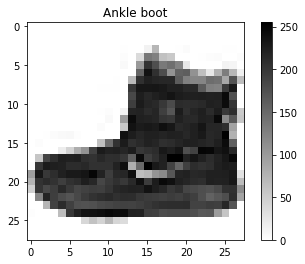

In [7]:
show_image(0)

## Question 1: Data Preprocessing
As you can see above, the images are valued from $[0,255]$. This is the normal range for images. Recall from the previous lectures and excercises that we need to normalize our data.

In order to normalize our data to $[0,1]$ we use the equation:

$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

In our case we can assume that $x_{min}=0$ and $x_{max}=255$, this is a safe assumption since we are working with image data.

This means that for image data, if we want to normlize to $[0,1]$ the equation simplifies to:

$$img_{norm}=\frac{img}{255}$$

Anytime you work with image data in any kind of model you will be normalizing with this equation. Unless the range you want to normalize is different. Sometimes you want to normalize between $[-1,1]$, for that you would use a slightly different equation.




### Question 1.1) Normalizing the data
Normalize BOTH the training and testing images using the above equation.

In [0]:
def normalize_greyscale(image_array):
  x_min = 0
  x_max = 255
  normalized_images = (image_array - x_min) / (x_max - x_min)
  return normalized_images

train_images = normalize_greyscale(train_images)
test_images = normalize_greyscale(test_images)

If we show the image again, you will see the values are all scaled correctly.

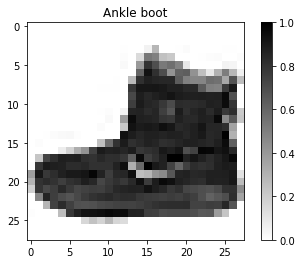

In [9]:
show_image(0)

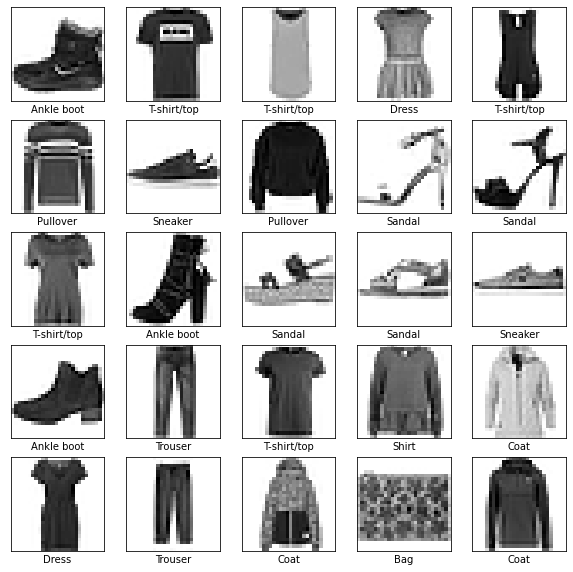

In [10]:
# Lets sample our data to see what kind of images are stored.
# see documentation for subplot here:
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
train_images.shape

(60000, 28, 28)

### Question 1.2) Data visualization
Since our data is composed of grayscale images (one channel) with a resolution of $28\times28$, we can think of this as the images existing in a $28\times28=784$ dimensional space. This means that every single image in our dataset can be represented by a vector of length $784$.

Please reshape BOTH the training and testing images to be $784D$. 


In [13]:
def vectorize(image_array, desiredShape=(1, 784)):
  newVec = np.empty(shape=(len(image_array),desiredShape[1]),dtype='object') 
  for image in range(0,len(image_array)):
    newVec[image,:] = np.reshape(image_array[image],desiredShape) 
  return newVec

print(f'Before reshape, train_images shape: {train_images.shape} test_images shape: {test_images.shape}')
train_images = vectorize(train_images, desiredShape=(1, 784)) # 
test_images = vectorize(test_images, desiredShape=(1, 784))# 
print(f'Before reshape, train_images shape: {train_images.shape} test_images shape: {test_images.shape}')

Before reshape, train_images shape: (60000, 28, 28) test_images shape: (10000, 28, 28)
Before reshape, train_images shape: (60000, 784) test_images shape: (10000, 784)


In [0]:
desiredShape=(1, 784)

def vectorize(image_array, desiredShape=(1, 784)):
  newVec = np.empty(shape=(len(image_array),desiredShape[1]),dtype='object') 
  for image in range(0,len(image_array)):
    newVec[image] = np.reshape(image_array[image],desiredShape) 
  return newVec



In [15]:
train_images.shape

(60000, 784)

In [16]:
a = vectorize(train_images, desiredShape=(1, 784))
a[0].shape

(784,)

We create a dataframe using our training and testing data to keep everything tidy.

In [17]:
# Add training data into a dataframe
img_data = {f"z{i}":train_images[:,i] for i in range(784)}
img_data["label"] = train_labels
df_img_train = pd.DataFrame(img_data)
df_img_train["class"] = df_img_train["label"].map(class_dict)
df_img_train.head(10)

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26,z27,z28,z29,z30,z31,z32,z33,z34,z35,z36,z37,z38,z39,...,z746,z747,z748,z749,z750,z751,z752,z753,z754,z755,z756,z757,z758,z759,z760,z761,z762,z763,z764,z765,z766,z767,z768,z769,z770,z771,z772,z773,z774,z775,z776,z777,z778,z779,z780,z781,z782,z783,label,class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,Ankle boot
1,0,0,0,0,0,0.00392157,0,0,0,0,0.160784,0.737255,0.403922,0.211765,0.188235,0.168627,0.341176,0.658824,0.521569,0.0627451,0,0,0,0,0,0,0,0,0,0,0,0.00392157,0,0,0,0.192157,0.533333,0.858824,0.847059,0.894118,...,0.952941,0.839216,0.878431,0.635294,0,0.00784314,0,0,0,0,0,0,0,0,0,0.00392157,0,0,0.545098,0.572549,0.509804,0.529412,0.529412,0.537255,0.490196,0.486275,0.490196,0.47451,0.466667,0.447059,0.509804,0.298039,0,0,0,0,0,0,0,T-shirt/top
2,0,0,0,0,0,0,0,0,0,0.0862745,0.462745,0.0941176,0,0,0,0,0,0.188235,0.345098,0.0196078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0470588,0.392157,0.831373,0.803922,...,0.294118,0.0392157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00392157,0,0,0,0.0705882,0.164706,0.223529,0.219608,0.12549,0.0313725,0,0,0.00392157,0,0,0,0,0,0,0,0,T-shirt/top
3,0,0,0,0,0,0,0,0,0.129412,0.376471,0.686275,0.611765,0.25098,0.054902,0.211765,0.537255,0.8,0.760784,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.286275,0.729412,0.694118,0.717647,0.686275,0.737255,...,0.333333,0.627451,0.521569,0.392157,0.0470588,0,0,0,0,0,0,0,0,0,0,0,0.0156863,0,0.00784314,0,0.137255,0.0156863,0.129412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Dress
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.101961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.741176,0.807843,0.733333,0.12549,...,1,0.27451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.239216,0.4,0.658824,0.0980392,0,0.545098,0.631373,0.290196,0,0,0,0,0,0,0,0,0,0,0,T-shirt/top
5,0,0,0,0,0.00392157,0,0,0,0,0.0862745,0.345098,0.737255,0.67451,0.517647,0.490196,0.552941,0.780392,0.560784,0.0352941,0,0,0,0.00392157,0,0,0,0,0,0,0,0,0.00392157,0,0,0.0784314,0.513725,0.780392,0.807843,0.768627,0.792157,...,0,0,0,0,0.878431,0.772549,0.482353,0,0,0,0,0,0,0,0.552941,0.592157,0.298039,0,0.00392157,0.00392157,0,0,0,0,0,0,0,0,0,0,0,0,0.521569,0.654902,0.286275,0,0,0,2,Pullover
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,Sneaker
7,0,0,0,0,0,0.00392157,0.00392157,0,0,0,0,0.247059,0.109804,0,0,0,0.129412,0.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00784314,0,0,0.109804,0.494118,0.945098,1,...,0,0,0.0156863,0,0.403922,0.964706,0.968627,0.282353,0,0,0,0,0,0.00392157,0.372549,0.301961,0.203922,0,0.0156863,0,0,0,0,0,0,0,0,0,0,0,0.0117647,0,0.321569,0.929412,0.905882,0.27451,0,0,2,Pullover
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.513725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,Sandal
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.00392157,0,0.266667,0.113725,0,0.0117647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,Sandal


In [18]:
# Add test data into a dataframe
img_data = {f"z{i}":test_images[:,i] for i in range(784)}
img_data["label"] = test_labels
df_img_test = pd.DataFrame(img_data)
df_img_test["class"] = df_img_test["label"].map(class_dict)
df_img_test.head()

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26,z27,z28,z29,z30,z31,z32,z33,z34,z35,z36,z37,z38,z39,...,z746,z747,z748,z749,z750,z751,z752,z753,z754,z755,z756,z757,z758,z759,z760,z761,z762,z763,z764,z765,z766,z767,z768,z769,z770,z771,z772,z773,z774,z775,z776,z777,z778,z779,z780,z781,z782,z783,label,class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,Ankle boot
1,0,0,0,0,0,0,0,0,0,0,0.0509804,0.262745,0,0,0,0,0.196078,0.14902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0313725,0.470588,0.819608,0.886275,0.968627,...,0,0,0,0.152941,0.976471,1,0.482353,0,0,0,0,0,0,0,0.192157,0.803922,0.772549,0.0431373,0,0.0156863,0.00392157,0.00784314,0.00784314,0.00784314,0.00784314,0.00784314,0.00784314,0.00784314,0.00784314,0.0117647,0,0.0117647,0.682353,0.741176,0.262745,0,0,0,2,Pullover
2,0,0,0,0,0,0,0,0,0.00392157,0,0.262745,0.694118,0.505882,0.6,0.458824,0.505882,0.572549,0.552941,0.686275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00784314,0,0.768627,1,...,0.988235,0.466667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.384314,0.623529,0.278431,0,0,0.266667,0.690196,0.643137,0.227451,0,0,0,0,0,0,0,0,1,Trouser
3,0,0,0,0,0,0,0,0,0,0.0823529,0.482353,0.423529,0.388235,0.388235,0.329412,0.32549,0.337255,0.360784,0.27451,0.0235294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.415686,0.972549,0.901961,...,0.180392,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0784314,0.682353,0.396078,0,0,0,0.572549,0.572549,0.00392157,0,0,0,0,0,0,0,0,0,1,Trouser
4,0,0,0,0.00784314,0,0.00392157,0.00392157,0,0,0,0,0.223529,0.262745,0.286275,0.298039,0.298039,0.32549,0.243137,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00392157,0.00392157,0.00392157,0,0,0.0509804,0.309804,0.501961,0.788235,...,0.772549,0.713725,0.635294,0.239216,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.117647,0.282353,0.372549,0.427451,0.435294,0.435294,0.415686,0.396078,0.278431,0.0470588,0,0,0,0,0,0,0,0,6,Shirt


In [0]:
#df_img_test = pd.DataFrame(img_data)
#df_img_test["class"] = df_img_test["label"].map(class_dict)
#df_img_test.head()

Now we have our data reshaped into the $784D$ vectors, using these we can try and visualize the space they live in. However, accurately visualizing high dimensional spaces like these would be practically impossible. We use tools like principle component analysis (PCA), and tSNE to create a projection of this $784D$ space into a more digestible $2D$ or even $3D$.

Don't worry about how they work just yet, we are just using them to visualize our data. Just run the cells to see some cool visuals.

You can direcly use the built in PCA and TSNE models from sklearn, you import them like so:



In [0]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

These tools require our data to be scaled correctly.

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
standardized_data = StandardScaler().fit_transform(train_images)

In [0]:
n_comps = 50
pca = PCA(n_components=n_comps)
pca_features = pca.fit_transform(standardized_data)

In [24]:
# Add data into a dataframe
pca_data = {f"z{i}":pca_features[:,i] for i in range(n_comps)}
pca_data["label"] = train_labels
df_pca = pd.DataFrame(pca_data)
df_pca["class"] = df_pca["label"].map(class_dict)
df_pca.head()

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26,z27,z28,z29,z30,z31,z32,z33,z34,z35,z36,z37,z38,z39,z40,z41,z42,z43,z44,z45,z46,z47,z48,z49,label,class
0,-0.801175,20.866749,-12.945136,3.311432,-6.638684,1.052827,-0.103101,-5.388831,-3.998839,2.178396,0.635340,2.156507,-2.014106,2.092080,1.566760,0.128608,0.506848,1.234876,1.707697,1.372053,-0.635783,-0.740088,1.141918,0.410299,-2.749961,-2.045997,0.800692,-0.229866,2.224615,-3.836404,0.885427,2.434026,3.094487,-0.099009,-0.164075,-0.728558,-2.095457,-0.606814,1.316687,0.022172,1.626277,-0.507266,1.000217,2.127722,2.035121,-2.464354,0.069712,-0.503876,0.813558,-0.729849,9,Ankle boot
1,17.074206,-4.968512,-2.077820,5.895035,11.006847,4.803589,-11.846814,1.595990,-2.131134,-2.342784,0.710331,0.547558,0.945608,-2.220141,-2.886624,2.248219,1.077822,-1.710186,-0.250227,-2.760299,-0.042792,3.229279,3.402749,0.134975,1.626041,1.877346,-0.656109,1.012606,-1.728807,-2.325442,0.605749,0.259003,-0.979375,-2.318064,-1.835050,-0.029770,-4.221203,0.571751,1.400081,1.809722,0.622801,2.233369,-0.299214,-3.182368,-1.292238,-0.322200,2.099503,1.440635,-0.512541,1.259317,0,T-shirt/top
2,-9.601641,-12.296101,1.082284,2.580125,0.233065,-0.981053,1.219416,-1.124080,-0.818486,-0.131103,-0.099564,0.542967,0.531624,1.435662,-0.231813,-1.719201,-1.293940,-0.955549,-0.409681,-0.141733,0.197836,0.088020,0.982586,-0.528681,-0.324718,-1.778076,-0.623009,-1.371847,0.822935,0.024337,0.670509,0.347361,0.010835,-0.031394,0.255464,0.457346,-0.576291,-0.274355,-0.249433,0.006498,2.078682,0.242029,-1.531052,1.024915,-0.744283,0.398846,0.994112,1.029670,-1.946578,0.870671,0,T-shirt/top
3,-0.311206,-11.576765,3.223877,4.267873,2.366103,0.578038,-2.116618,-0.658573,-0.804144,2.684316,-2.654618,2.896895,-2.221664,3.471292,-3.451943,-2.855038,0.185434,-1.045672,0.066290,0.961195,2.024544,0.981517,2.041535,-0.447797,-0.856014,-1.539394,-1.306806,-2.264935,2.880863,-0.407230,0.353702,0.714490,0.284038,0.080995,0.566618,1.479270,-0.003439,-0.463026,-0.797999,-0.224164,-0.548006,0.664735,-1.027544,0.892284,-1.514865,1.406199,-0.711964,-0.446614,1.269457,1.079551,3,Dress
4,8.963833,-12.867738,-10.208862,-2.650564,-0.611276,3.657580,3.113013,0.510477,-1.683233,-0.392197,2.691410,2.082367,-1.374486,2.546045,-0.757540,-4.770146,-0.079345,0.953582,-2.602236,-2.325702,1.543249,-0.695069,-1.395566,-0.160658,-1.523070,-2.146017,-1.393858,0.567951,2.534269,-0.390420,0.694107,-0.314940,-0.780497,1.750242,-1.156391,1.850674,-0.033051,0.202944,-0.268982,-2.500697,1.237931,-0.478035,-0.516002,0.472903,0.374409,-0.129391,0.730495,0.286653,-0.949467,0.346008,0,T-shirt/top


In [25]:
df_pca.shape

(60000, 52)

In [26]:
print(f'Compressed dimension of {train_images.shape[1]} to {n_comps} maintaining {pca.explained_variance_ratio_.sum()*100:.2f}% of information.')

Compressed dimension of 784 to 50 maintaining 80.06% of information.


In [0]:
model = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=200, n_iter=1000)

In [28]:
print('This may take a few minutes...')
# We are only using the first 10000 data points, this is sufficient for this application.
visualization_data = model.fit_transform(pca_features[:10000])
print('Done.')

This may take a few minutes...
Done.


In [29]:
data_to_visualize = {"z1":visualization_data[:,0], "z2":visualization_data[:,1], "label":train_labels[:10000]}
df_visualize = pd.DataFrame(data_to_visualize)
df_visualize["class"] = df_visualize["label"].map(class_dict)
df_visualize.head()

,z1,z2,label,class
0,-9.781062,63.884769,9,Ankle boot
1,-36.664364,-50.763950,0,T-shirt/top
2,-24.738392,1.030137,0,T-shirt/top
3,-25.511705,-21.323481,3,Dress
4,-56.847744,-6.133393,0,T-shirt/top


### Projecting the classes in 2D for visualization
These images, which started out as $784$ dimensional vectors, are now being projected into a $2D$ space. Don't worry about how tSNE works, it essentially tries to estimate and project distances in a high dimensional space to $2D$. Below we can see a pretty good representation of the space where our data lives.

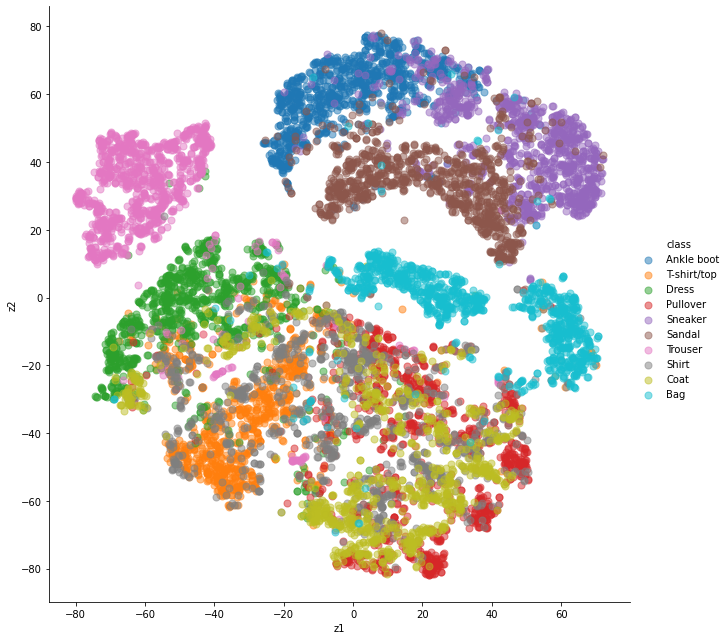

In [30]:
sns.lmplot(x='z1',
           y='z2',
           data=df_visualize, 
           fit_reg=False, 
           hue='class',
           height=9,
           scatter_kws={"s":50,"alpha":0.5})

## Question 2: Linearly Separable
*Some* of the data is easily to separate with a line, this concept is called linear separability. Below we plot only the Ankle Boot and Trouser class. See? It's easy to draw a line between them. This makes sense because it's easy to distinguish between a shoe and pants.


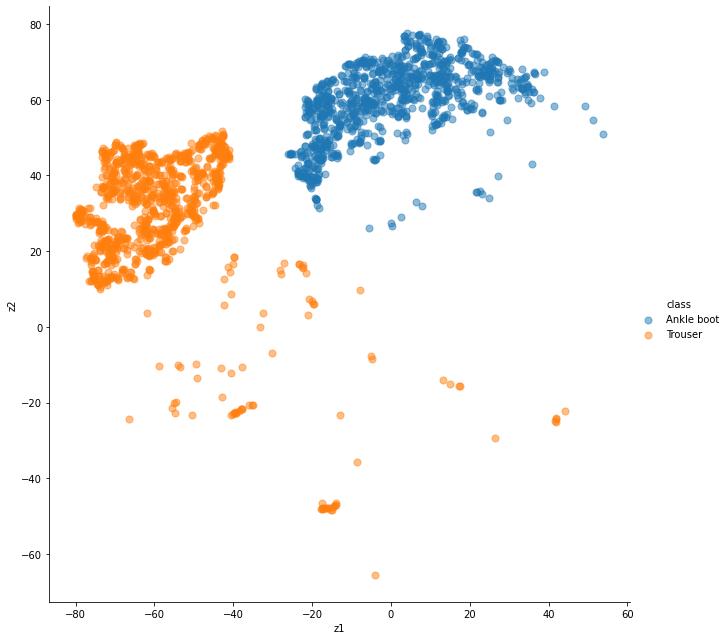

In [31]:
sns.lmplot(x='z1',
           y='z2',
           data=df_visualize[(df_visualize["class"] == "Ankle boot") | (df_visualize["class"] == "Trouser")], 
           fit_reg=False, 
           hue='class',
           height=9,
           scatter_kws={"s":50,"alpha":0.5})

How do you think our logistic regression model will fare at distinguishing Ankle boots from Trousers? Please explain.

#### 

Logistric regression should perform well on classifying between these two classes since the data appears to be lineraly seperable. A simple line should be able to classify Ankle boots from Trousers.

## Question 3: Not Linearly Separable

Now lets plot something harder to classify, the Pullover and Coat classes which are basically mixed together. You can't easily draw a line between them. This makes sense since a coat and a pullover are pretty similar.

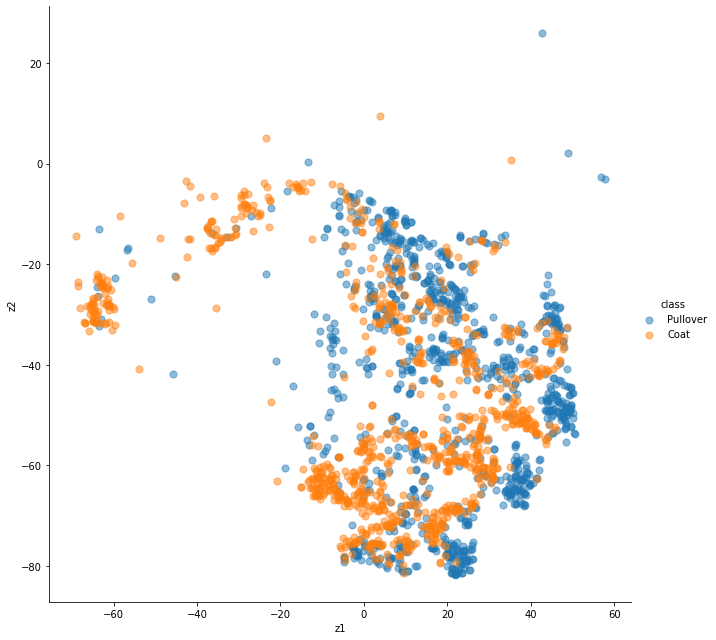

In [32]:
sns.lmplot(x='z1',
           y='z2',
           data=df_visualize[(df_visualize["class"] == "Pullover") | (df_visualize["class"] == "Coat")], 
           fit_reg=False, 
           hue='class',
           height=9,
           scatter_kws={"s":50,"alpha":0.5})

How do you think our logistic regression model will fare at distinguishing Pullovers from Coats? Please explain.

#### 

Logistic regression should not perform well on these two classes, The data does not seem to be linearly seperable and there is a lot of overlap between the images and we would likely need a more complicated model to classify between Pullovers from Coats. 

## Question 4: Logistic Regression



Recall that each image is $28\times28\times1$ matrix which we flatten to a $784$-dimensional row vector. Image $i$ lookes like:

\begin{equation}
\textbf x_{i} =
\begin{bmatrix}
    x_{1}       & x_{2} & \cdots & x_{784}   
\end{bmatrix}
\tag{1}
\end{equation}


Our dataset $\textbf X$ is then the collection of all these $n$ images.
 
\begin{equation} 
\textbf X =
\begin{bmatrix}
    x_{1,1}       & x_{1,2} & \cdots & x_{1,784} \\
    x_{2,1}       & x_{2,2} & \cdots & x_{2,784} \\
    \vdots       & \vdots & \ddots & \vdots \\
    x_{n,1}       & x_{n,2} & \cdots & x_{n,784}\\
\end{bmatrix}
\tag{2}
\end{equation}

Recall in lecture that logistic regression uses a bias term, we can easily incorporate this by adding a column of ones at the beginning.

\begin{equation}
\textbf X =
\begin{bmatrix}
    1 & x_{1,1}       & x_{1,2} & \cdots & x_{1,784} \\
    1 & x_{2,1}       & x_{2,2} & \cdots & x_{2,784} \\
   \vdots & \vdots       & \vdots & \ddots & \vdots \\
    1 & x_{n,1}       & x_{n,2} & \cdots & x_{n,784}
\end{bmatrix}
\tag{3}
\end{equation}

For each image we have a corresponding label $y_i$. This is the class "Coat", "Ankle boot", "Pullover", etc. Each of which is mapped to a unique number.

\begin{equation}
\textbf Y =
\begin{bmatrix}
    y_1  \\
    y_2  \\
    \vdots   \\
    y_{n} 
\end{bmatrix}
\tag{4}
\end{equation}

We will try to find the optimal parameter values $\theta = [\theta_0, \theta_1, \cdots, \theta_{784}]^T$ of our logistic regression model, where $\theta_0$ is the bias weight. To simplify our notation, let
 
\begin{equation}
Z = X \theta =
\begin{bmatrix}
    1 & x_{1,1}       & x_{1,2} & \cdots & x_{1,784} \\
    1 & x_{2,1}       & x_{2,2} & \cdots & x_{2,784} \\
    \vdots       & \vdots & \ddots & \vdots \\
    1 & x_{n,1}       & x_{n,2} & \cdots & x_{n,784}
\end{bmatrix} 
\begin{bmatrix}\theta_0 \\ \theta_1 \\ \vdots \\ \theta_{784} 
\end{bmatrix}=
\begin{bmatrix}
    \theta_0 + x_{1,1}\theta_1 + \cdots + x_{1,784}\theta_{748}  \\
    \theta_0 + x_{2,1}\theta_1 + \cdots + x_{2,784}\theta_{784}  \\
    \vdots   \\
    \theta_0 + X_{n,1}\theta_1 + \cdots + x_{n,784}\theta_{784}
\end{bmatrix} =
\begin{bmatrix}
    z_1  \\
    z_2  \\
    \vdots   \\
    z_{n}
\end{bmatrix}
\tag{5}
\end{equation}

Since each $z_i$ is in the range $(-\infty, \infty)$ and our labels are $[0,1]$ we pass $z_i$ into the sigmoid function.

\begin{equation}
\sigma(z_i) = \frac{1}{1+e^{-z_i}} = h_i
\tag{6}
\end{equation}


Now we can make predictions using $h_i$ by simply rounding it to 0 or 1.

\begin{equation}
pred_i = round(h_i)
\tag{7}
\end{equation}


In order to train our logistic regression model we need to find the parameter vector $\theta$ that minimizes our cost function $J$, we will be Binary Cross Entropy (BCE). 

\begin{equation}
\text{J} = -\frac{1}{n} \sum_{i=1}^{n} \left [ y_i\log (h_i) + (1-y_i)\log (1-h_i) \right ]
\tag{8} 
\end{equation}

Where $y_i$ is your true label and $h_i = \sigma (z_i)$.



In order to know whether we want to increment or decrement our weights to minimize the loss, we calculate its partial derivative with respect to weights, we call this the gradient, the matrix form of the gradient is:

\begin{equation}
\nabla \text{J} = \frac{1}{n}X^T (H-Y)\tag{9}
\end{equation}

with $X =
\begin{bmatrix}
    1 & x_{1,1}       & x_{1,2} & \cdots & x_{1,784} \\
    1 & x_{2,1}       & x_{2,2} & \cdots & x_{2,784} \\
   \vdots & \vdots       & \vdots & \ddots & \vdots \\
    1 & x_{n,1}       & x_{n,2} & \cdots & x_{n,784}
\end{bmatrix}$,  $ \textbf Y =
\begin{bmatrix}
    y_1  \\
    y_2  \\
    \vdots   \\
    y_{n} 
\end{bmatrix}$, and $ \textbf H =
\begin{bmatrix}
    h_1  \\
    h_2  \\
    \vdots   \\
    h_{n} 
\end{bmatrix}$

We then use this gradient in an iterative algorithm called gradient descent where every iteration we change the wieghts like so:

\begin{equation}
\theta^{(t+1)} = \theta^{(t)} - \alpha \nabla \text{J}
\tag{10}
\end{equation}


Where $t$ is the iteration number, $\alpha$ is your learning rate, $\theta^{(t)}$ is your current weight column vector, and $\theta^{(t+1)}$ is your updated weight column vector.



---



For this question you will implement some of the necessary functions for logistic regression:
 - The BCE loss function
 - The gradient/derivative of the BCE loss function
 - The sigmoid function
 - The predict function
 - The accuracy function

You will also complete the weight update within the gradient descent algorithm.

In [0]:
def get_data_subset(df, classes=[], shuffle=True, shuffle_seed=42):
  if classes == []:
    return None
  else:
    df_filtered = df[(df["class"] == classes[0]) | (df["class"] == classes[1])].copy()
    df_filtered["binary_label"] = 0
    df_filtered.loc[df["class"] == classes[1], "binary_label"] = 1
    data = df_filtered.filter(regex=("z[0-9]+")).values
    labels = df_filtered["binary_label"].values
    if shuffle:
      np.random.seed(shuffle_seed)
      np.random.shuffle(data)
      np.random.seed(shuffle_seed)
      np.random.shuffle(labels)
  
  return data, labels.reshape(-1,1)

In [0]:
def train_test_validation_split(X, y, test_size=.20, validation_size=.20):
    trainIdx = int((1. - test_size - validation_size)*X.shape[0])
    testIdx = int((1. - test_size)*X.shape[0])
    validationIdx = int(1.0 * X.shape[0])
    X_train, y_train = X[:trainIdx], y[:trainIdx]
    X_test, y_test = X[trainIdx:testIdx], y[trainIdx:testIdx]
    X_val, y_val = X[testIdx:validationIdx], y[testIdx:validationIdx]
    return X_train, y_train, X_test, y_test, X_val, y_val

def bias_trick(X):
    return np.hstack((np.ones((X.shape[0],1)), X))

In [0]:
# applying sigmoid function (equation 6) to the vector input of z_i's
def sigmoid(z):  
    z = np.array(z,dtype=np.float32)
    sig_z = 1 / ( 1 + np.exp(-z)) # 
    return sig_z

# implementing equation 8    
def binary_cross_entropy(y, h):
  n = len(y)
  summation = np.sum( (y*np.log(h)) + (1 - y)*np.log( 1 - h ) )
  return (-1/n) * summation # 

# returns the derivation of the BCE function based on equation 9
def binary_cross_entropy_derivative(X, y, theta): 
  # remember Z = X theta 
    z = np.matmul(X,theta) 
    h = sigmoid(z) # 
    n = len(y)
    X_T = X.transpose()
    #print(X_T.shape)
    #print(f'BCED: X_T shape {X_T.shape}')
    return (1 / n) * np.matmul(X_T,(h - y))  # 

# returns percentage of correct predictions   
def accuracy(y, h):

    comparisons = y - h
    numInCorrect = np.count_nonzero(comparisons)
    accuracy = 1 - numInCorrect / len(y)
    return accuracy 

# returns predictions for all inputs. Given input is h_i based on equations 7.
def predict(h):
    # pred_i = round(h_i)
    return np.round(h) # 

def logistic_regression(X, y, learning_rate, num_steps):

    # split your data into train and test subsets. Don't forget to apply the bias trick before you split!
    X = bias_trick(X)
    X_train, y_train, X_test, y_test, X_val, y_val = train_test_validation_split(X,y)
    X_dim = X_train.shape
    theta = np.zeros((X_dim[1],1)) # 
    z = np.array(np.dot(X,theta),dtype=np.float32)
    h = sigmoid(z)
    print(f'Initial Accuracy: {accuracy(y, predict(h)):.4f}')
    val_losses = []
    train_losses = []
    val_accuracies = []
    train_accuracies = []
    
    for step in range(num_steps):
        # Calculate the current output of your logistic network (h_train and h_val)
        z_train = np.array(np.dot(X_train,theta),dtype=np.float32) # 
        h_train = sigmoid(z_train)
        z_val =  np.array(np.dot(X_val,theta),dtype=np.float32) # 
        h_val = sigmoid(z_val) # 

        # Calculate your current training/validation accuracy and BCE loss
        training_accuracy = accuracy(y_train, predict(h_train)) # 

        training_loss = binary_cross_entropy(y_train, h_train) # 
        validation_accuracy = accuracy(y_val, predict(h_val))# 
        validation_loss = binary_cross_entropy(y_val, h_val) # 

        val_losses.append(validation_loss)
        val_accuracies.append(validation_accuracy)
        train_losses.append(training_loss)
        train_accuracies.append(training_accuracy)
  
        # Calculate the gradient using the derivative of your loss function.
        gradient = binary_cross_entropy_derivative(X_train, y_train, theta)# 
        
        # Adjust your weights
        theta = theta - learning_rate * gradient# 
        
        print(f'Epoch [{step+1}/{num_steps}] '.ljust(20) + f'loss: {training_loss:.4f} - accuracy: {training_accuracy:.4f} - ', end='')
        print(f"val_loss: {validation_loss:.4f} - val_accuracy: {validation_accuracy:.4f}")
    return theta, train_losses, train_accuracies, val_losses, val_accuracies

Now that we have our logistic implementation complete, let's try and classify Ankle boots against Trousers.

We get the subset of the data containing these classes using the function defined above.

Don't change the learning rate or number of steps.

In [0]:
X, y = get_data_subset(df_img_train, classes=["Trouser", "Ankle boot"])

In [37]:
y.shape

(12000, 1)

In [38]:
# train the model until it converges, use the plotted losses below to verify
learning_rate = 0.05
num_steps = 100
theta, train_losses, train_accuracies, val_losses, val_accuracies = logistic_regression(X, y, learning_rate, num_steps) 

Initial Accuracy: 0.5000
Epoch [1/100]       loss: 0.6931 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.4967
Epoch [2/100]       loss: 0.4047 - accuracy: 0.9917 - val_loss: 0.4044 - val_accuracy: 0.9908
Epoch [3/100]       loss: 0.2816 - accuracy: 0.9956 - val_loss: 0.2812 - val_accuracy: 0.9938
Epoch [4/100]       loss: 0.2171 - accuracy: 0.9960 - val_loss: 0.2167 - val_accuracy: 0.9942
Epoch [5/100]       loss: 0.1778 - accuracy: 0.9961 - val_loss: 0.1775 - val_accuracy: 0.9946
Epoch [6/100]       loss: 0.1515 - accuracy: 0.9962 - val_loss: 0.1511 - val_accuracy: 0.9962
Epoch [7/100]       loss: 0.1325 - accuracy: 0.9962 - val_loss: 0.1322 - val_accuracy: 0.9958
Epoch [8/100]       loss: 0.1182 - accuracy: 0.9962 - val_loss: 0.1179 - val_accuracy: 0.9958
Epoch [9/100]       loss: 0.1071 - accuracy: 0.9964 - val_loss: 0.1067 - val_accuracy: 0.9962
Epoch [10/100]      loss: 0.0981 - accuracy: 0.9964 - val_loss: 0.0977 - val_accuracy: 0.9971
Epoch [11/100]      loss: 0.0907 - 

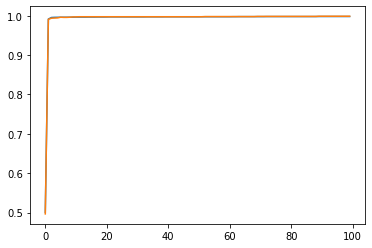

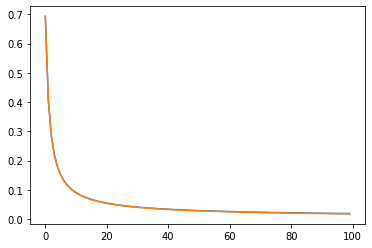

In [39]:
import matplotlib.pyplot as plt
# plot your training accuracy and validation accuracy curves together
plt.plot(train_accuracies)
plt.plot(val_accuracies)
plt.show()

# plot your training losses and validation losses curves together
plt.plot(train_losses)
plt.plot(val_losses)
plt.show()

### Question 4.1) Observation
What accuracy did it reach? Why do you think it reached this accuracy? How long did it take?

#### 

After 100 epochs at a learning rate of 0.05, ( takes several seconds )the model was able to achieve the following final accuracy values: 

accuracy: 0.9981 
val_accuracy: 0.9988

These accuracy values are very good and were likely achievable since the data was inspected to be linearly seperable. Logistic regression works well on data points that don't require very complex decision boundaries to be made. 

Now train it to classify Pullover vs. Coat.

In [0]:
X, y = get_data_subset(df_img_train, classes=["Pullover", "Coat"])

In [41]:
# train the model until it converges, use the plotted losses below to verify
# modify learning_rate and num_steps to accomplish this
learning_rate = 0.1
num_steps = 100
theta, train_losses, train_accuracies, val_losses, val_accuracies = logistic_regression(X, y, learning_rate, num_steps) 

Initial Accuracy: 0.5000
Epoch [1/100]       loss: 0.6931 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5058
Epoch [2/100]       loss: 0.6653 - accuracy: 0.5128 - val_loss: 0.6664 - val_accuracy: 0.5079
Epoch [3/100]       loss: 0.7000 - accuracy: 0.5007 - val_loss: 0.6982 - val_accuracy: 0.5067
Epoch [4/100]       loss: 1.2283 - accuracy: 0.4996 - val_loss: 1.2339 - val_accuracy: 0.4942
Epoch [5/100]       loss: 2.3088 - accuracy: 0.5004 - val_loss: 2.2860 - val_accuracy: 0.5058
Epoch [6/100]       loss: 1.8471 - accuracy: 0.4996 - val_loss: 1.8534 - val_accuracy: 0.4942
Epoch [7/100]       loss: 1.9310 - accuracy: 0.5004 - val_loss: 1.9157 - val_accuracy: 0.5058
Epoch [8/100]       loss: 1.9859 - accuracy: 0.4996 - val_loss: 1.9905 - val_accuracy: 0.4942
Epoch [9/100]       loss: 1.7044 - accuracy: 0.5004 - val_loss: 1.6944 - val_accuracy: 0.5058
Epoch [10/100]      loss: 1.9775 - accuracy: 0.4999 - val_loss: 1.9798 - val_accuracy: 0.4938
Epoch [11/100]      loss: 1.5961 - 

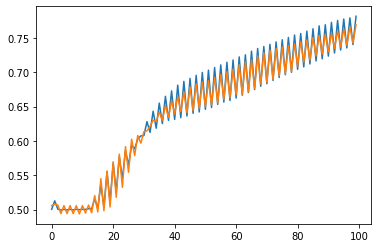

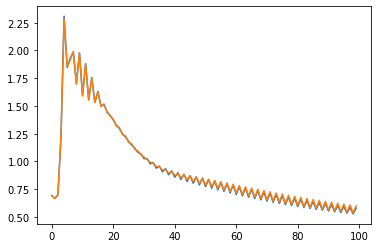

In [42]:
import matplotlib.pyplot as plt
# plot your training accuracy and validation accuracy curves together
plt.plot(train_accuracies)
plt.plot(val_accuracies)
plt.show()

# plot your training losses and validation losses curves together
plt.plot(train_losses)
plt.plot(val_losses)
plt.show()

### Question 4.2) Observation
What accuracy did it reach? Why do you think it reached this accuracy? How long did it take?

#### 

What accuracy did it reach? Why do you think it reached this accuracy? How long did it take?

After 1000 epochs at a learning rate of 0.1, (which takes several minutes to compute depending on hardware ) the model was able to achieve the following final accuracy values: 

accuracy: 0.8757
val_accuracy: 0.8692

These accuracy values are very good and were likely achievable because these two classes are very similar, causing the data and its features to not be linearly seperable. Logistic regression works well on data points that don't require very complex decision boundaries to be made. 

## Question 4.3) Comparison
Compare and contrast both runs above, are they the same? Different? Then explain why this is the case.


#### 

As mentioned in both analyses, both runs are very different. Since the Ankle boots and trousers are very different from each other and linearly seperable, logistic regression was able to perform well on drawing a line for its binary classification. Pullovers and Coats however somewhat similar to each other visually, causing the features that describe each class to be similar to each other with a lot of overlap. Logistic regression performs poorer on this set compared to Anklle boot and trouser because of this difference, even when the training performed on the Pullover coat set was increased in terms of epoch and reduced in terms of learning rate ( to accomodate for their similar features ). 

## Question 5: Neural Networks


In this question we will build a neural network with Keras that can beat our logistic regression model at classifying Pullovers vs. Coats.

In [43]:
from tensorflow.keras.layers import Input, Dense # only use these layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import * # you can use any optimizer

input_Size = X.shape[1]
print(input_Size)

# Define an input layer with the correct shape for your data
input_layer =  Input(shape=(input_Size))# 

# Pass the input layer's output to a dense of size 100, choose whatever activation you think is suitable
x = Dense(100, activation='tanh')(input_layer)# 

# Pass the previouses hidden layer's output to a dense of size 1 for classification, what activation do we need to use?
output = Dense(1, activation='sigmoid')(x) # 

# Define a model with it's input as your input layer and output as your output layer
model = Model(input_layer, output)# 

784


In [44]:
# Show a summary of your model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 78,601
Trainable params: 78,601
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile your model with your chosen optimizer, binary cross entropy for the loss, and accuracy as the metric
sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
# 

In [46]:
y.shape

(12000, 1)

In [47]:
X, y = get_data_subset(df_img_train, classes=["Pullover", "Coat"])

X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

# Call fit on your model passing in the X, y data above with validation split of 0.2 and train for 100 epochs
hist = model.fit(X,
                y, 
                epochs=100, 
                validation_split=0.2,
                )

Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 0.4163 - accuracy: 0.8130 - val_loss: 0.4638 - val_accuracy: 0.8183
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8593 - val_loss: 0.3262 - val_accuracy: 0.8717
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3268 - accuracy: 0.8664 - val_loss: 0.5497 - val_accuracy: 0.7188
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3232 - accuracy: 0.8678 - val_loss: 0.3227 - val_accuracy: 0.8708
Epoch 5/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3276 - accuracy: 0.8630 - val_loss: 0.2982 - val_accuracy: 0.8842
Epoch 6/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3103 - accuracy: 0.8691 - val_loss: 0.3931 - val_accuracy: 0.8421
Epoch 7/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3024 - accuracy: 0.8740 - val_loss: 0.3585 - val_accuracy: 0.8525

In [0]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

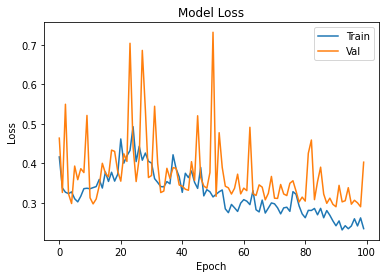

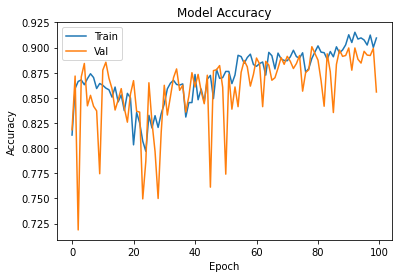

In [49]:
# plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

## Question 5.1) Observation
How did your neural network perform? What hyperparameters and optimizer did you choose to beat logistic regression? Why do you think your neural network beat your logistic regression model?

#### 

Using the following hyperparameters and optimizer:

epochs = 100

optimizer = stochastic gradient descent 

loss function = binary_crossentropy

hidden layer activation = 'tanh'

output layer activation = 'sigmoid'

lr=0.05 

decay=1e-6 

momentum=0.9


The neural network was able to outperform the logistic regression model with an accuracy of 0.8980 on training and slightly performed worse on validation with 0.8650. The neural network however was trained in a fraction of the time of the logistic regression. Recall the earlier plot Pullovers and Coats as classes against z1 and z2, the model was not clearly lineraly seperable and thus required a more complex approach to accomplish classification. Neural networks were able to outperform logistic regression by operating on a much more complex model than logistic regression (despite their easier method of implementation). Logistic regression can only tune the values of the weight vector theta (784 parameters), while neural networks must adjust up to 78,601 parameters, much more than logistic regression. Additionally neural networks are much more flexible with in terms of design, architectures and hyperparameters can be changed between training sessions in order to form a more complex solution.